In [3]:
#different versio of numpy required for top2vec
!pip uninstall numpy
!pip install numpy==1.19.5

Uninstalling numpy-1.20.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.20.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-5bebc122.3.13.dev.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.20.3
     |████████████████████████████████| 14.8MB 204kB/s 
ERROR: top2vec 1.0.24 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 whi

In [2]:
#install the packages
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install torch sentence_transformers
!pip install top2vec[indexing] #for searching
!pip install sentence-transformers
!pip install fastText

     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 15.3MB 187kB/s 
     |████████████████████████████████| 6.4MB 34.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 33.7MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311686 sha256=37d84276cdf070b6eb2fa96cdd9f8588f0d727ed85f7084be43e69677669e2df
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=de720962a73f30036688a1218410bc16b31a790dab6913948d4c2d888725a515
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=513

     |████████████████████████████████| 4.3MB 2.9MB/s 
     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 2.3MB 4.2MB/s 
     |████████████████████████████████| 1.2MB 29.1MB/s 
     |████████████████████████████████| 3.3MB 37.3MB/s 
     |████████████████████████████████| 901kB 35.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=5e3258227eaab6616bfc4dcd23c641e98fa1e4e348986b83068af3787820866e
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built sentence-transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hnswlib: filename=hnswlib-0.5.1-cp37-cp37m-linux_x86_64.whl size=1296725 sha256=565e97ea6faf82d627bbbea85b2a74ae12c5c4f1eaa11e59bc939b4abf6bdcb5
  Stored in directory: /root/.cache/pip/wheels/

In [102]:
#import required packages

#typical imports
import random
from tqdm import tqdm
import numpy as np
import os

#nltk imports
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#transformer imports
from sentence_transformers import SentenceTransformer
from top2vec import Top2Vec
import torch

#miscellaneous
import fasttext

#tensorflow imports for tensorboard visualizations
# import tensorflow as tf
# import tensorflow_datasets as tfds
# from tensorboard.plugins import projector
# #load tensorboards with magics
# %tensorflow_version 2.x
# %load_ext tensorboard


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [103]:
#get the data from github
!git clone https://github.com/akashjorss/sentence_bert
!unzip sentence_bert/sentences.zip
import pickle
with open('sentences.bin', 'rb') as f:
  sentences = pickle.load(f)

fatal: destination path 'sentence_bert' already exists and is not an empty directory.
Archive:  sentence_bert/sentences.zip
replace sentences.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [93]:
#randomly sample few documents (to check if the pipeline is working)
documents = random.choices(sentences,k = 10000)

In [ ]:
"""For preprocessing the text, esp. for unsupervised models, the following steps need to be done:
1. Named entity recognition. 
2. Sentiment word removal
3. Lemmatisation (or stemming?)
4. Stop word removal. 
After I do all of the above, the results should be better, at least for unsupervised models. 
This is one advantage of using unsupervised modelling. That we could do text engineering before clustering. 
Because doing text engineering after clustering is pain in the ass, and with pretrained models we basically
have to do that to get good results. 
Also, I need to use the newer dataset. 
Creating some visualizations would also be nice. 
Also some cluster statistics are needed.""" 


In [ ]:
"""About coherence and Information gain:
We take average of coherence because for each cluster we are taking top-k words and not all the words
in the cluster. 
Similarly for information gain we are taking all the documents in that cluster into account. So, we can
take the sum. """

In [84]:
#get named entities
import spacy

nlp = spacy.load("en_core_web_sm")
def get_named_entities(text):
  doc = nlp(text)
  named_entities = [ent.text for ent in doc.ents]
  return named_entities

#test
# get_named_entities("Apple is looking at buying U.K. startup for $1 billion")  

['Apple', 'U.K.', '$1 billion']

In [86]:
#get sentiment words
sentiment_tags = ['JJ','JJR','JJS', 'RBR' ,'RBS']
def get_sentiment_words(text): #do pos tagging with spacy
  pos_tagged = nltk.pos_tag(word_tokenize(text))
  # print(pos_tagged)
  sentiment_words = [t[0] for t in pos_tagged if t[1] in sentiment_tags]
  
  return sentiment_words

#test
# get_sentiment_words("Apple is looking at buying U.K. startup for $1 billion. It was really nice!")

In [94]:
stopwords = nltk.corpus.stopwords.words("english")
for i in tqdm(range(len(documents))):
  doc = documents[i]
  named_entities = []#get_named_entities(doc)
  sentiment_words = get_sentiment_words(doc)
  tokens = [t for t in word_tokenize(documents[i]) \
              if (t not in stopwords) and (t not in named_entities) and (t not in sentiment_words)]
  documents[i] = " ".join(tokens)
documents = [d.lower() for d in documents]





  0%|          | 0/10000 [00:00<?, ?it/s]



  1%|          | 76/10000 [00:00<00:13, 755.21it/s]



  1%|▏         | 149/10000 [00:00<00:13, 745.81it/s]



  2%|▏         | 210/10000 [00:00<00:14, 698.49it/s]



  3%|▎         | 278/10000 [00:00<00:14, 689.80it/s]



  3%|▎         | 347/10000 [00:00<00:13, 689.76it/s]



  4%|▍         | 413/10000 [00:00<00:14, 679.02it/s]



  5%|▍         | 475/10000 [00:00<00:14, 657.68it/s]



  5%|▌         | 539/10000 [00:00<00:14, 647.99it/s]



  6%|▌         | 615/10000 [00:00<00:13, 676.67it/s]



  7%|▋         | 681/10000 [00:01<00:13, 669.51it/s]



  8%|▊         | 752/10000 [00:01<00:13, 678.99it/s]



  8%|▊         | 819/10000 [00:01<00:13, 672.30it/s]



  9%|▉         | 886/10000 [00:01<00:14, 642.33it/s]



 10%|▉         | 950/10000 [00:01<00:14, 633.76it/s]



 10%|█         | 1014/10000 [00:01<00:14, 634.17it/s]



 11%|█         | 1082/10000 [00:01<00:13, 646.87it/s]



 11%|█▏        | 1149/10000 [00:01<00:13, 652.07it/s]


In [98]:
#testing
documents[15]

'had view 10th floor .'

In [7]:
#download and save sentence-bert 
sbert_model = SentenceTransformer('stsb-mpnet-base-v2')
torch.save(sbert_model, "./stsb-mpnet-base-v2.pt")

In [ ]:
#download and train tsdae transformer


In [ ]:
"""
Some cluster statistics 

In [95]:
#Build topic models using USE, SBert and Doc2Vec
use = Top2Vec(documents, embedding_model='universal-sentence-encoder', workers=4, document_ids=list(range(0,len(documents)))) #Is it transoformer or DAN?
# sbert = Top2Vec(documents, embedding_model_path='./stsb-mpnet-base-v2.pt', workers=4, document_ids=list(range(0,len(documents)))) #download sentence sbert
# doc2vec = Top2Vec(documents, embedding_model='doc2vec', workers=4, document_ids=list(range(0,len(documents))), speed="fast-learn") #, 
#tsdae = 

2021-06-04 12:13:33,520 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-06-04 12:13:34,683 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2021-06-04 12:13:38,605 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-06-04 12:13:39,860 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-06-04 12:14:09,876 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-06-04 12:14:10,328 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [99]:
#Some statistics about topic models
print("Total num of topics in USE:", use.get_num_topics())
print("Total num of topics in doc2vec:", doc2vec.get_num_topics())
print("Total num of topics in sentence-bert:", sbert.get_num_topics())

Total num of topics in USE: 96
Total num of topics in doc2vec: 3
Total num of topics in sentence-bert: 1331


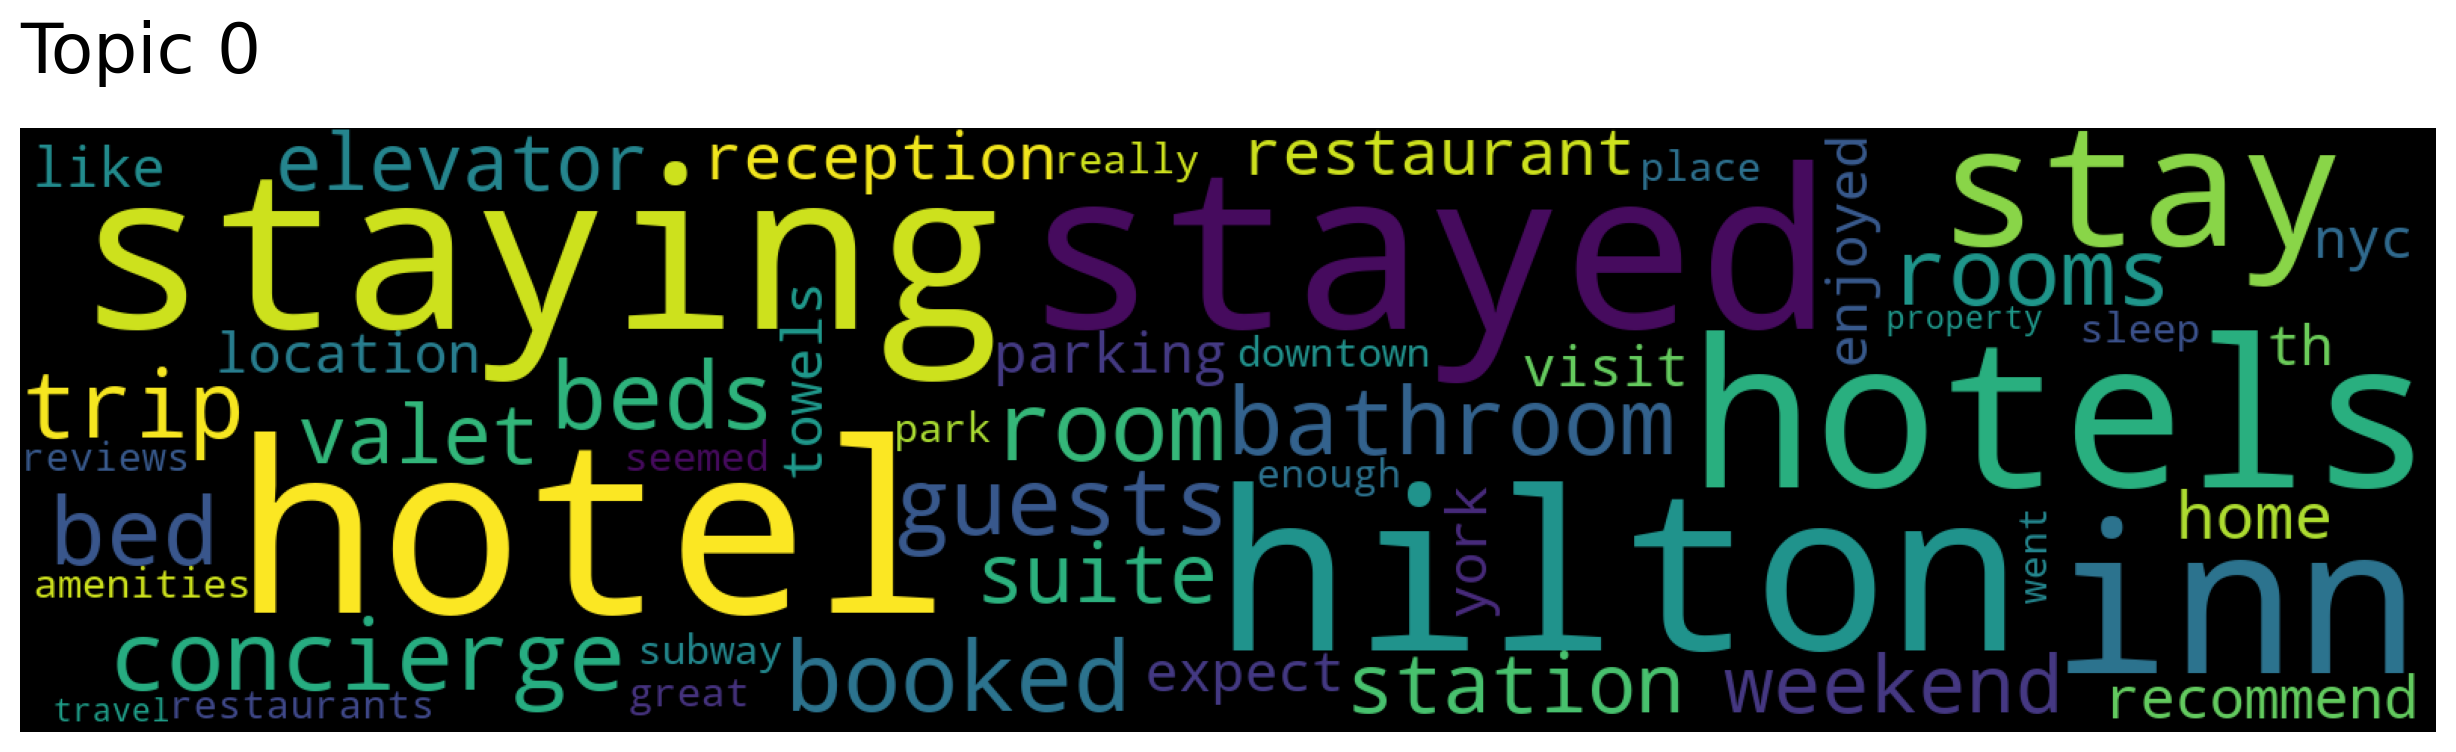

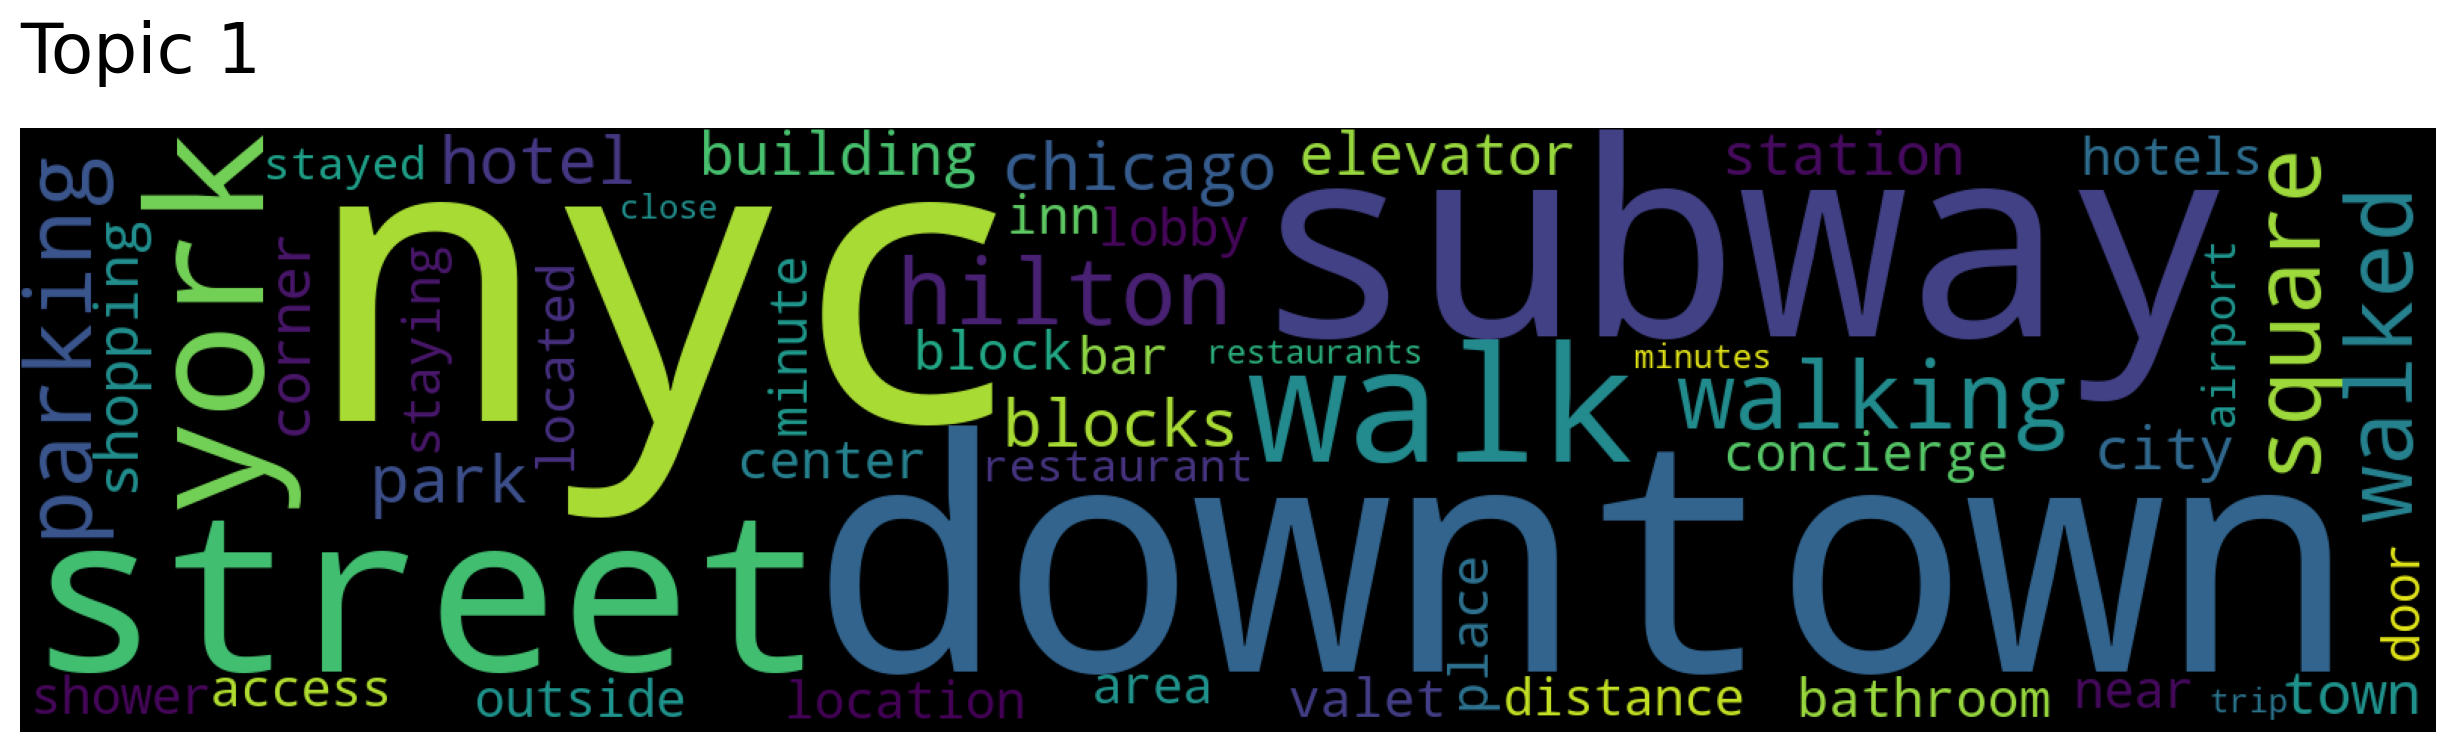

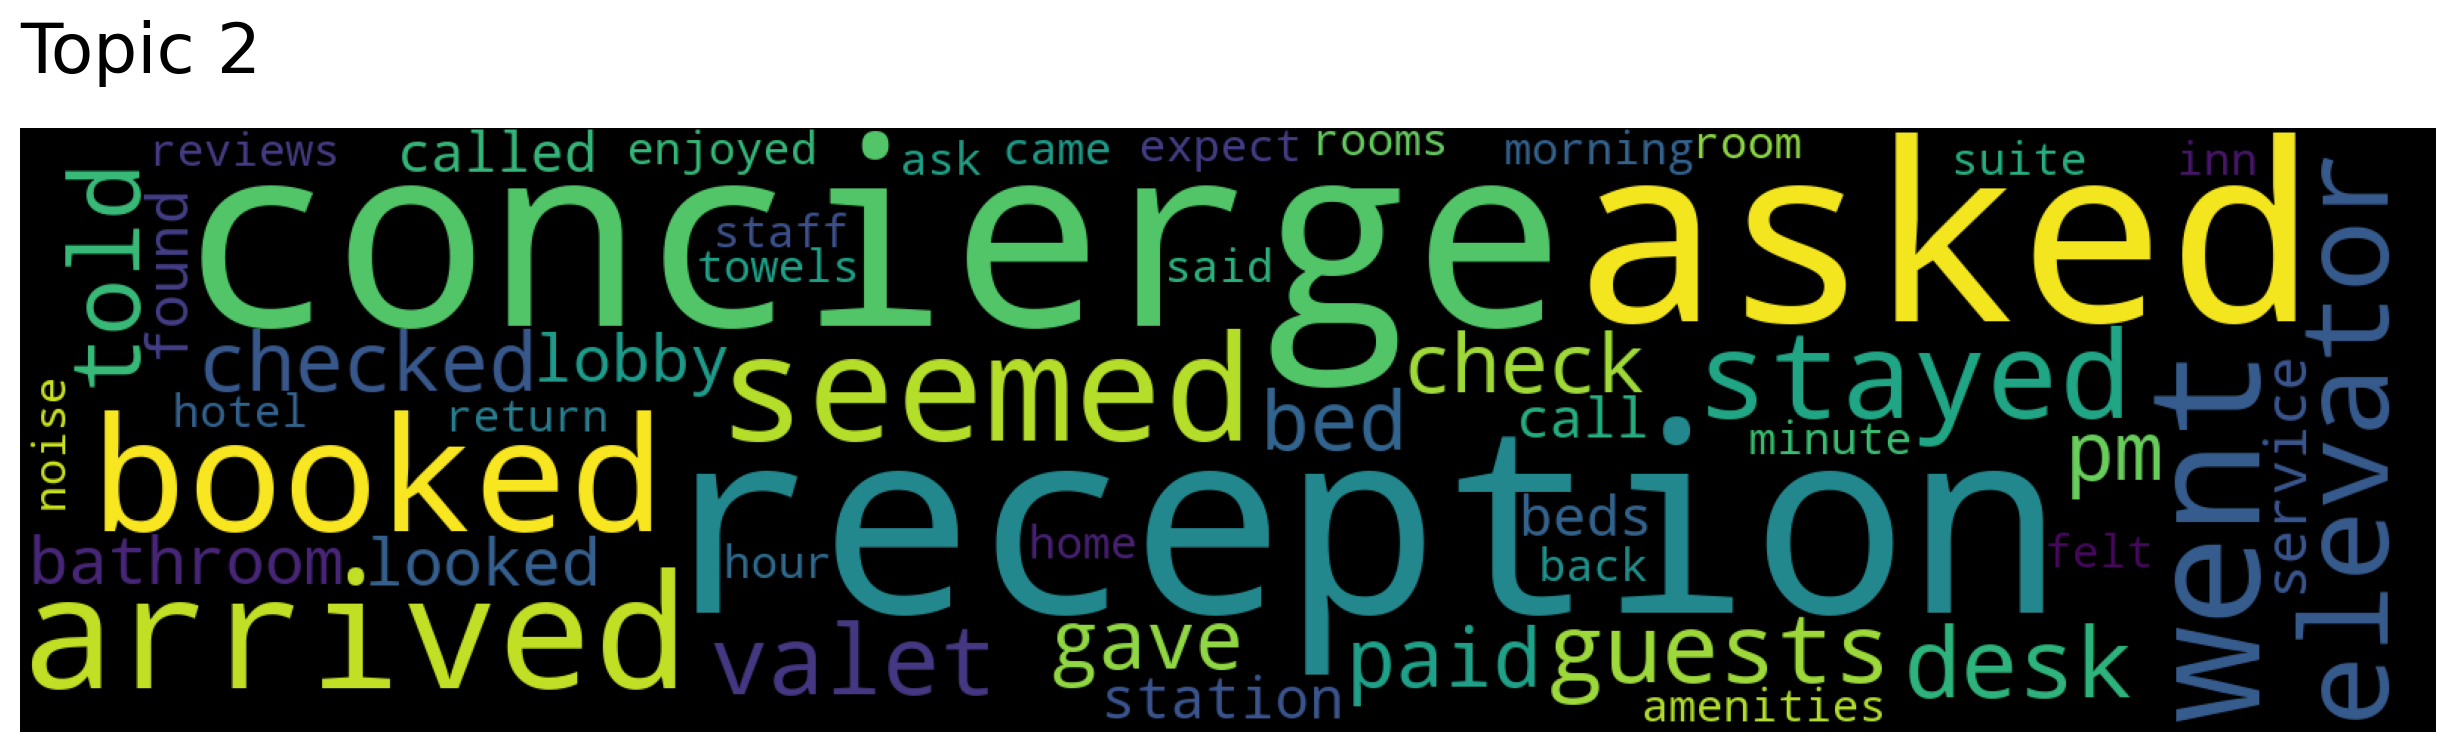

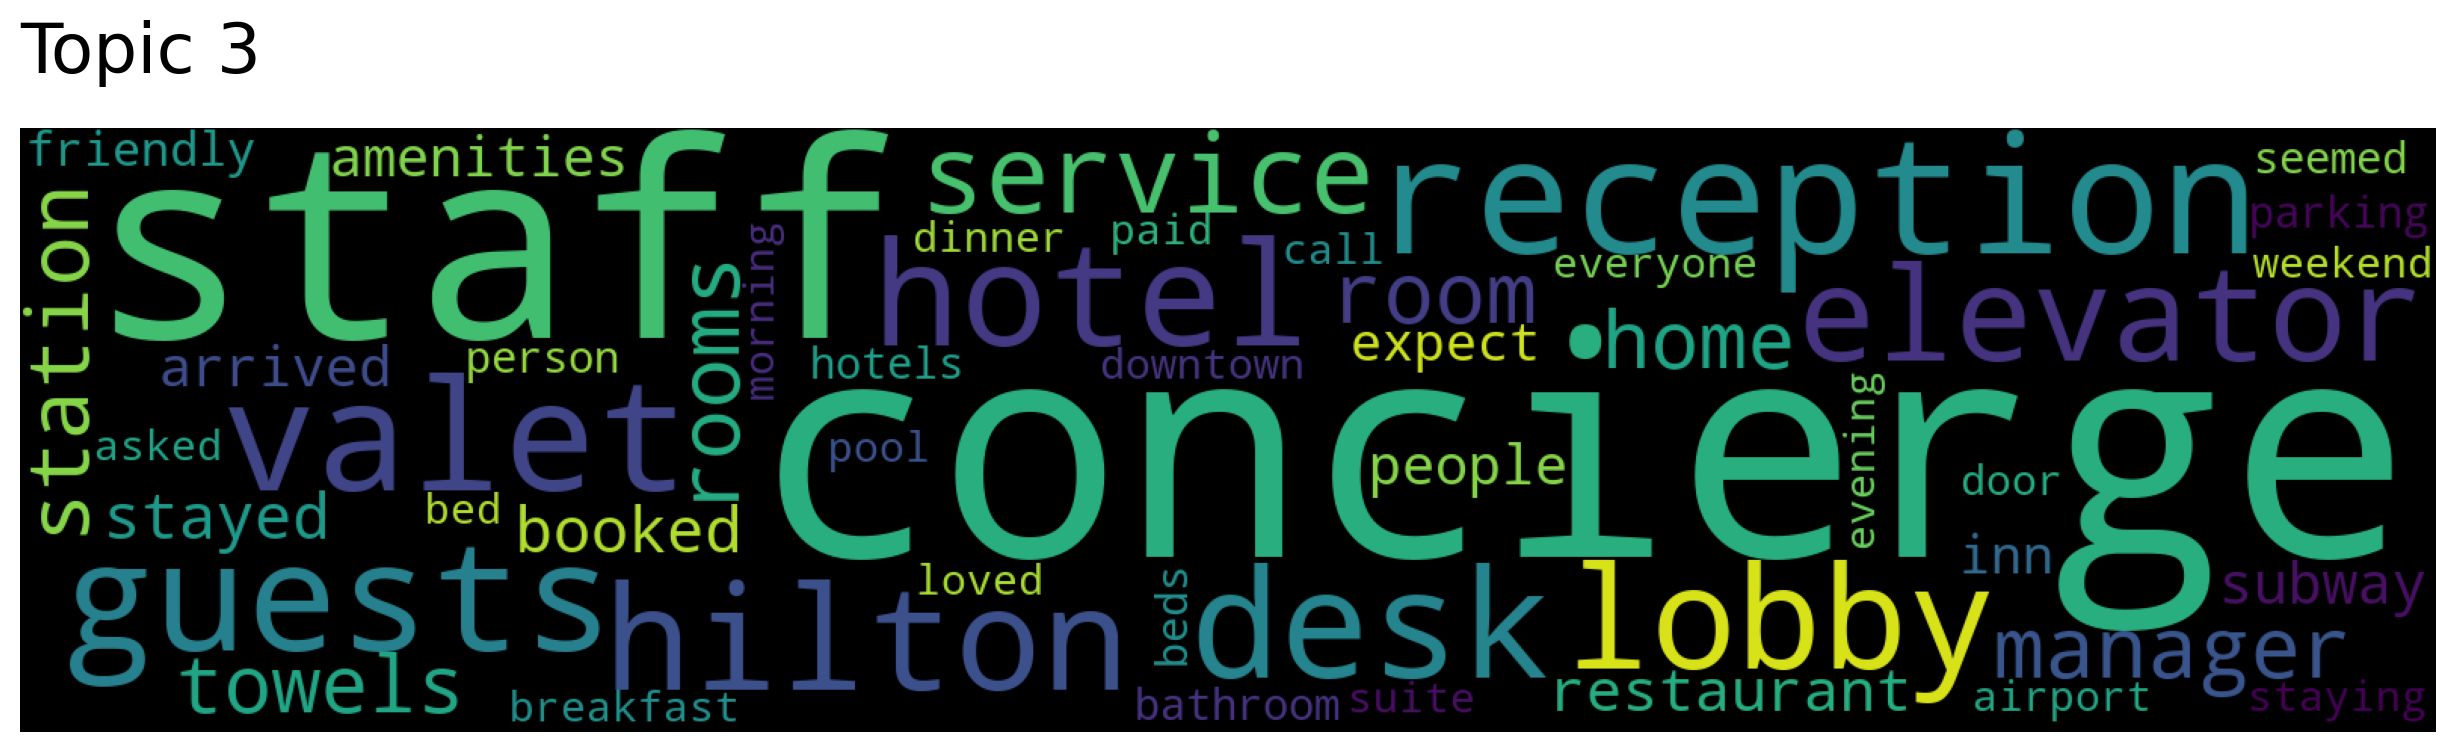

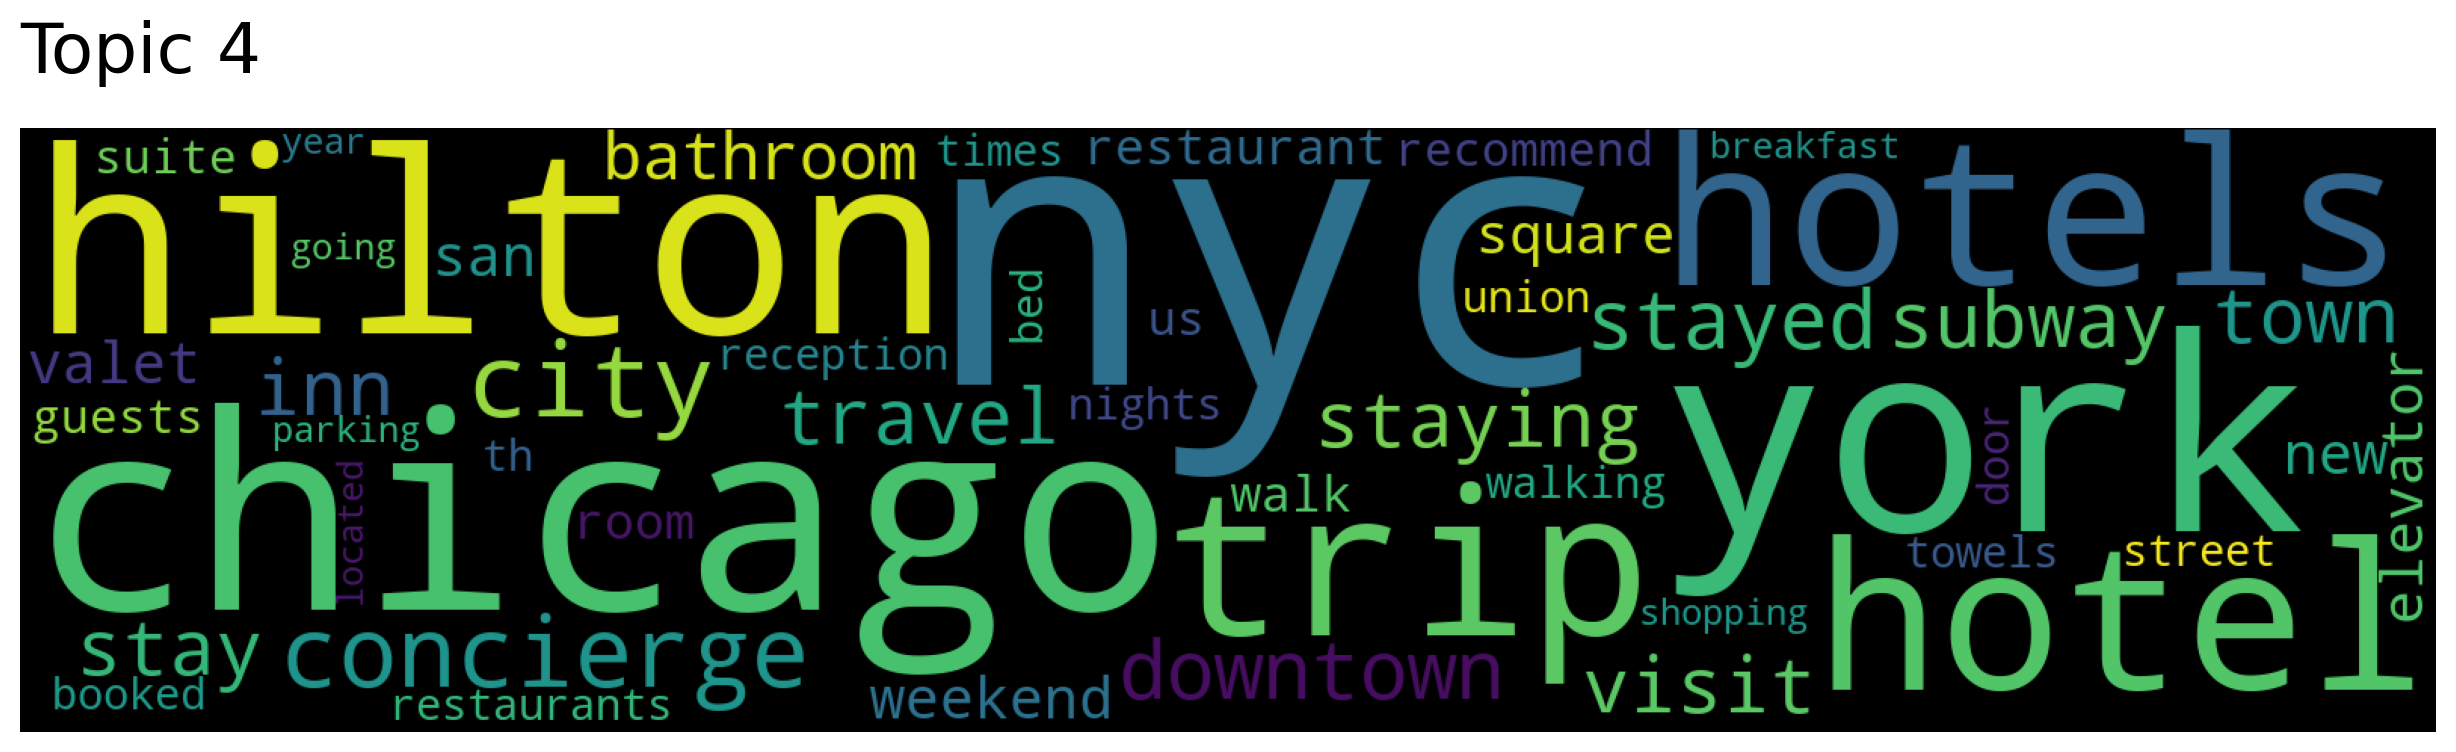

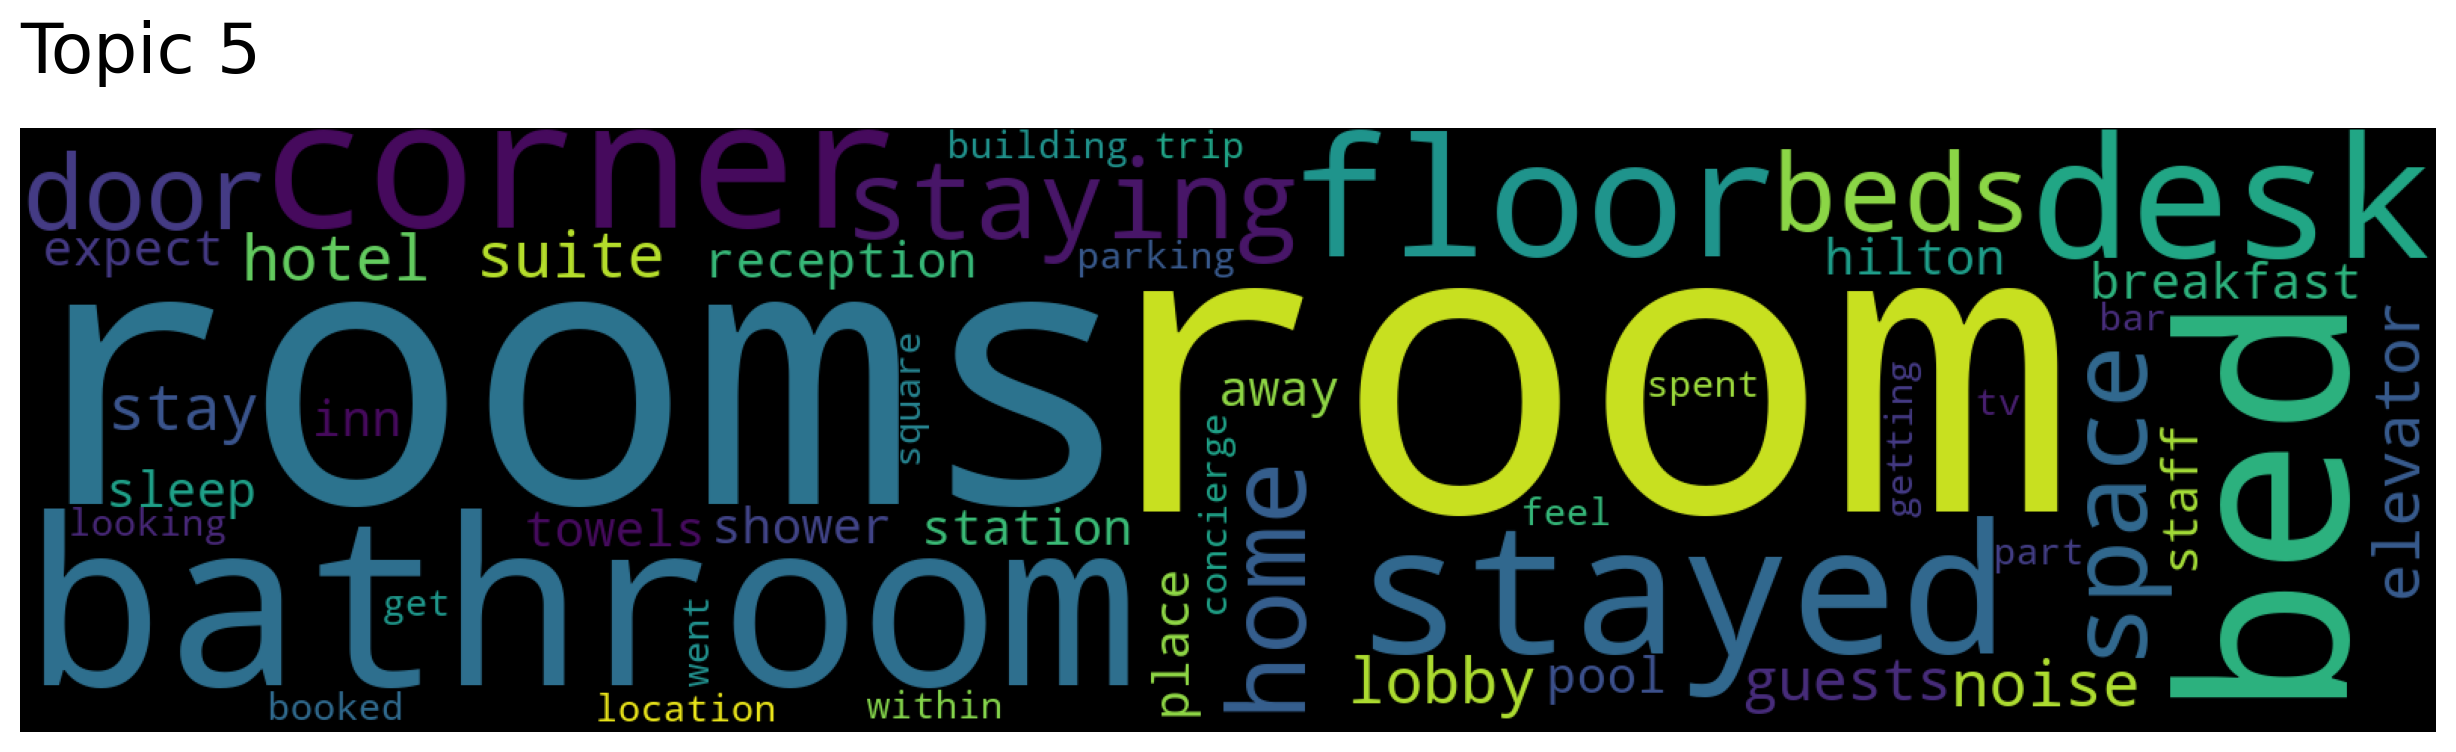

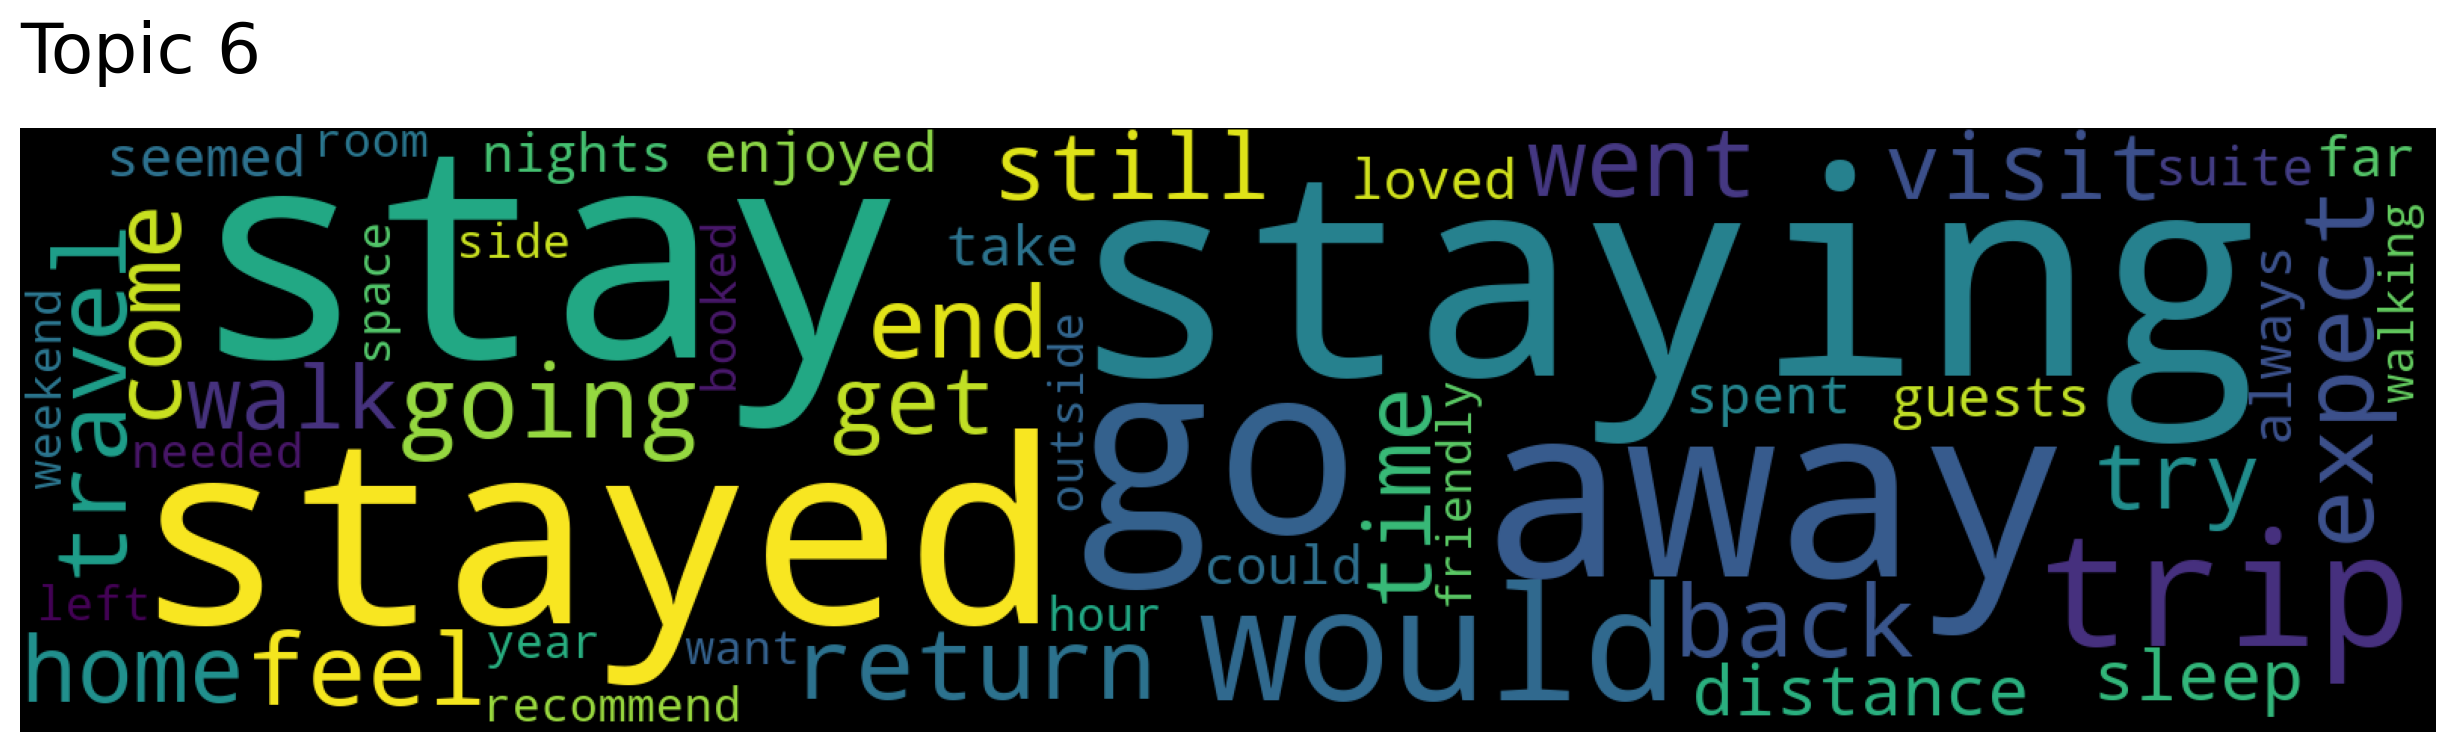

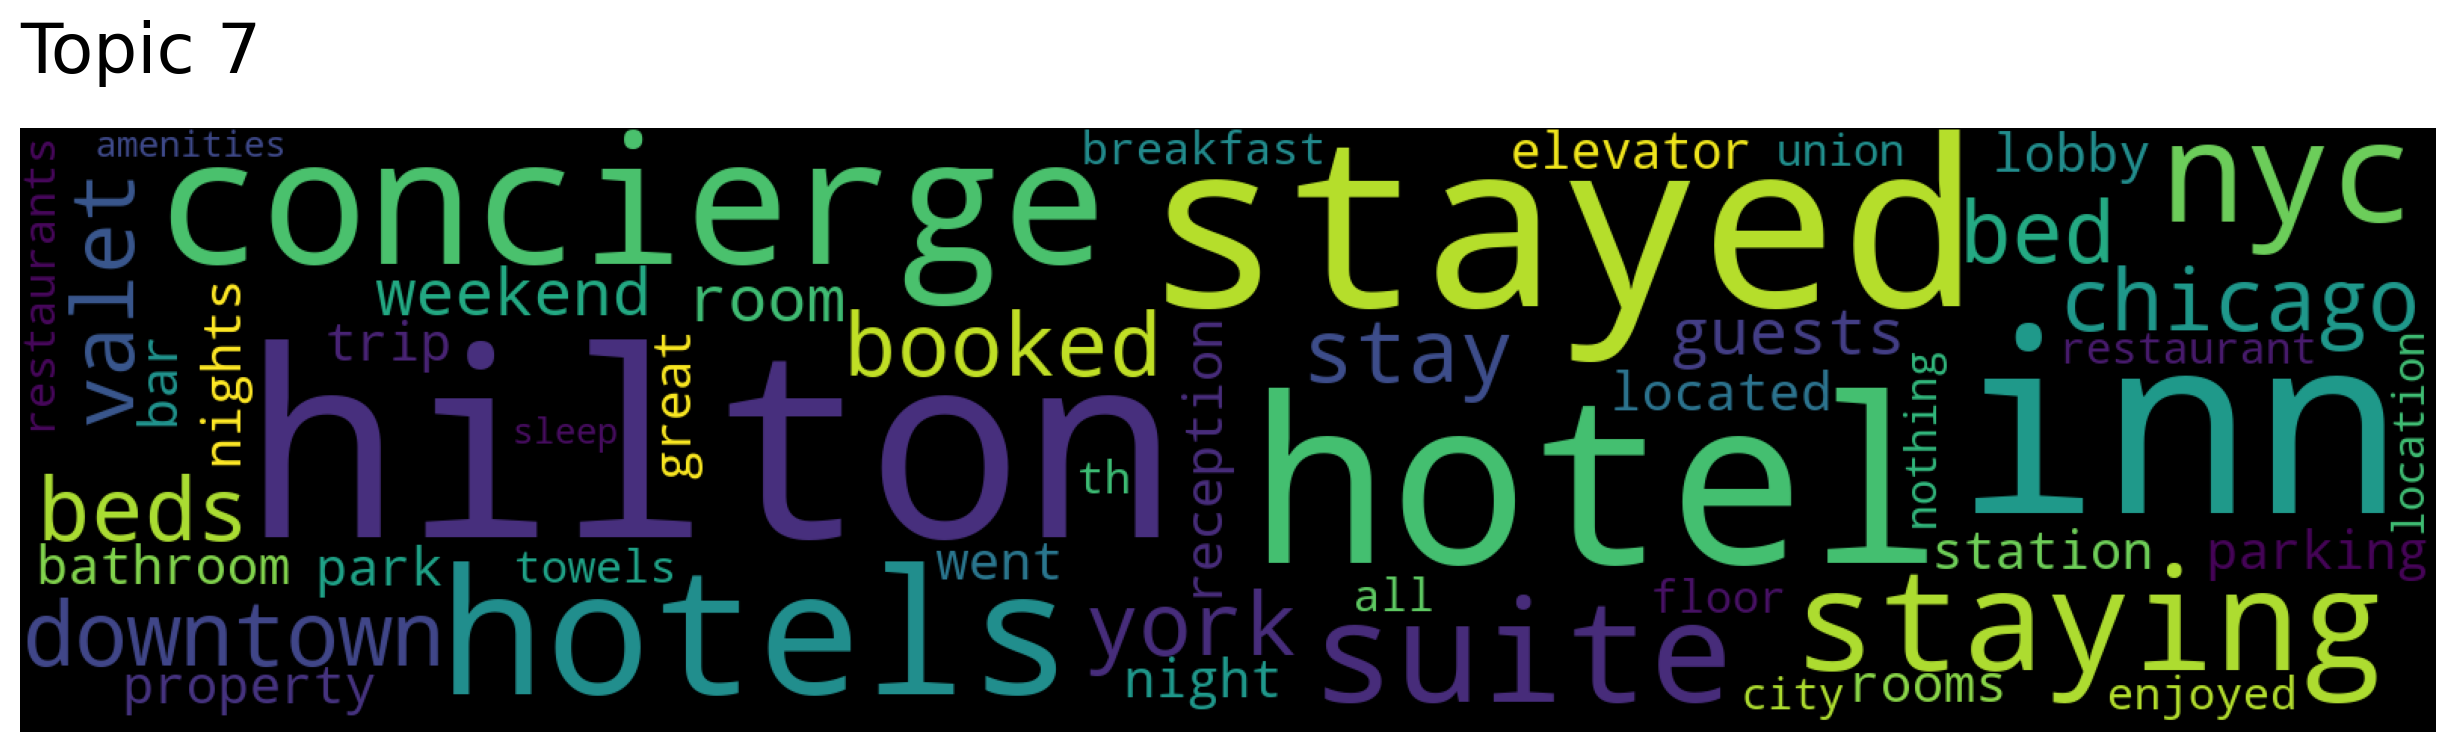

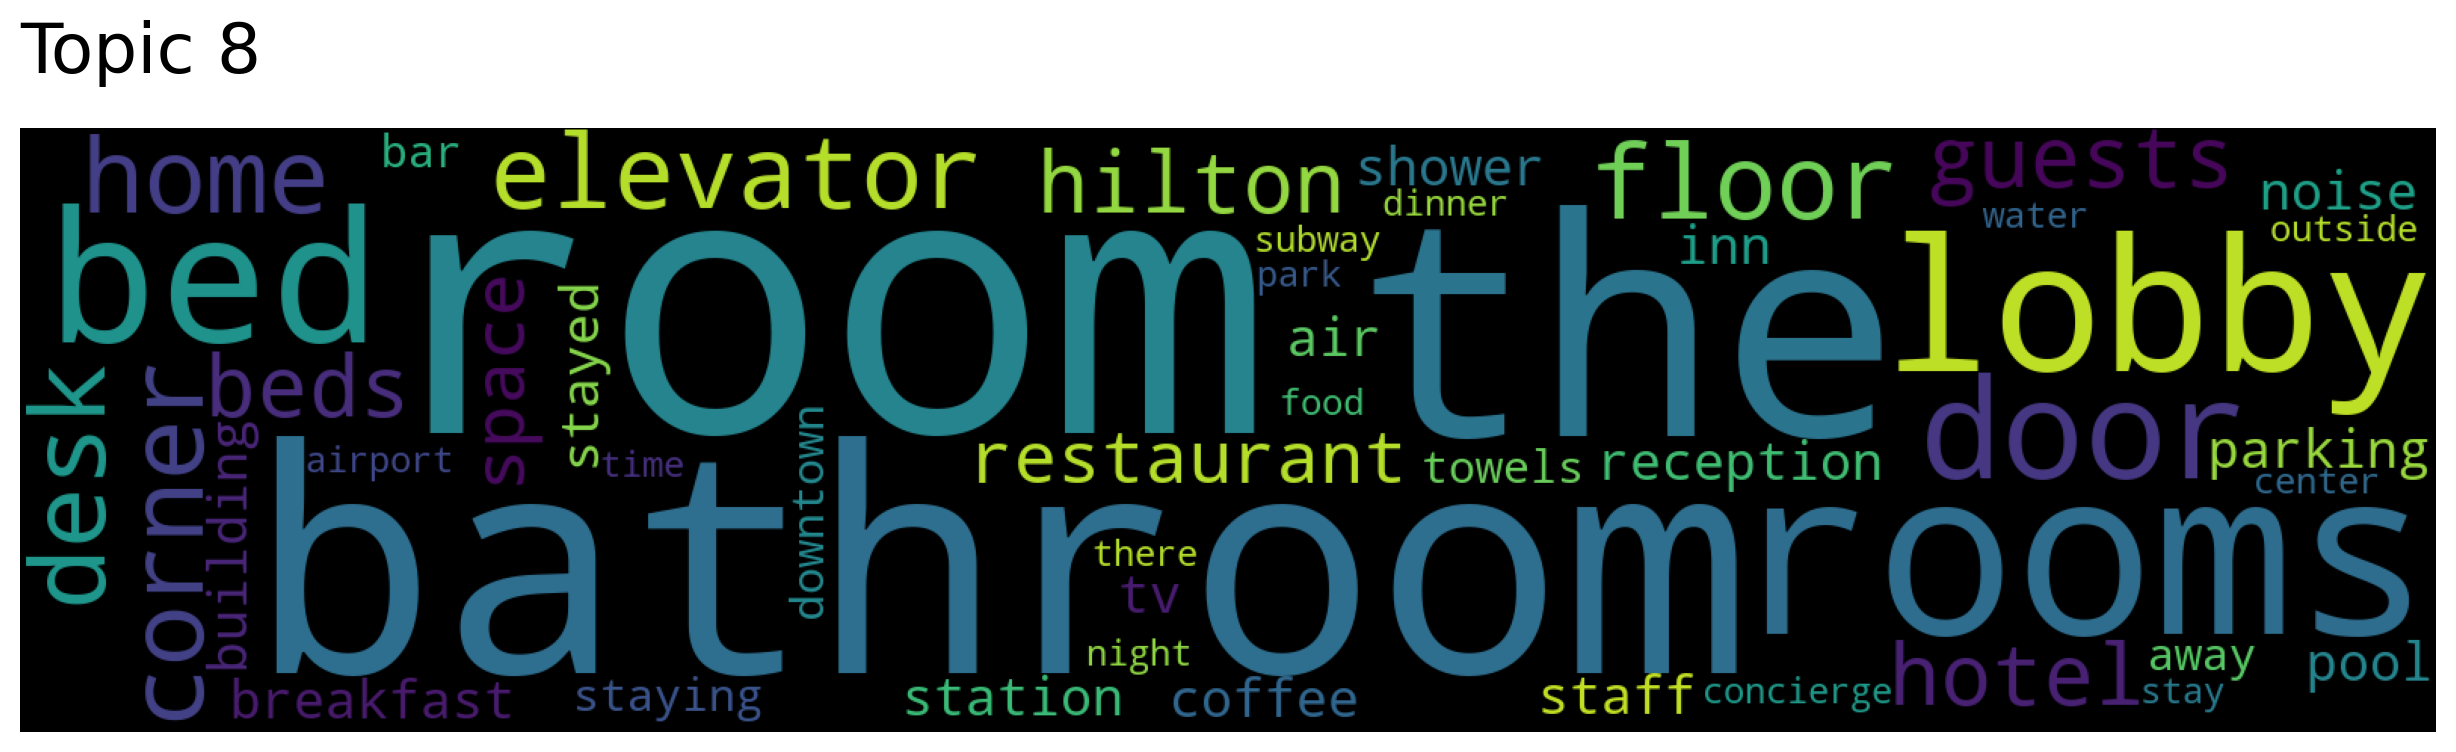

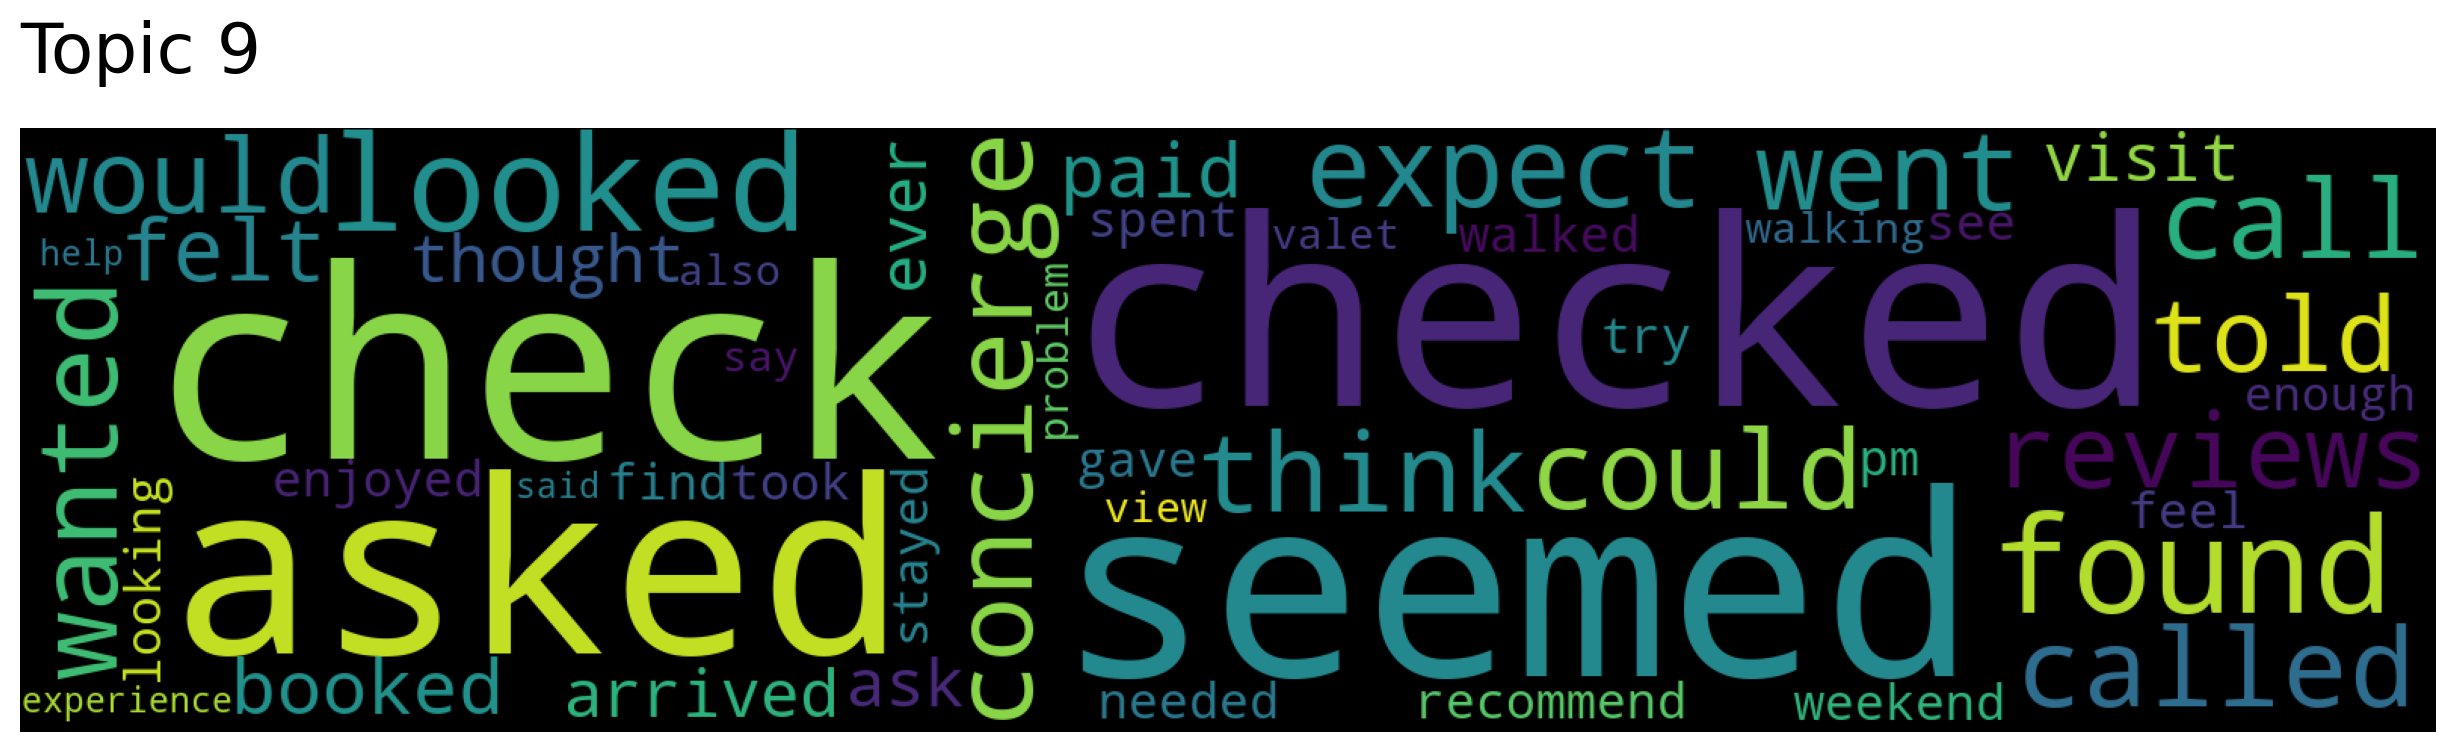

In [106]:
# use.hierarchical_topic_reduction(50)
for topic_num in range(10):
  use.generate_topic_wordcloud(topic_num, background_color='black', reduced=True)

In [40]:
#Function to calculate information gain of a dataset docs and top k representative words
def calc_IG(words, docs):
  """calculate information gain for a topic in topic model containing words and documents
  args:
    words (list): list of top words in the topic. 
    docs (list): list of docs in the topic
  returns:
    ig (float): information gain of this topic with respect to total independence b/w words and docs"""
  #sanity check
  assert(len(words)!=0)
  assert(len(docs)!=0)
  words = list(set(words)) #drop the redundant words
  #convert words to lower case
  words = [word.lower() for word in words]
  #tokenize the docs using nltk punkt
  tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]
  #create inverted index between words and docs
  inverted_index = np.zeros((len(words),len(docs)))
  for i in range(len(words)):
    for j in range(len(docs)):
      inverted_index[i][j] = tokenized_docs[j].count(words[i])
  # print(words)
  # print(inverted_index)
  ig = 0.0
  P_d = 1/len(docs)
  P_w = 1/len(words)
  for i in range(len(words)):
    for j in range(len(docs)):
      if np.sum(inverted_index[i]) != 0:
        P_dw = inverted_index[i][j]/np.sum(inverted_index[i]) #total number of documents in which w occurs
        if P_dw != 0:
          ig += P_dw*P_w*np.log2(P_dw/P_d)
  
  return ig     

#test
# doc1 = "The big sharks of Belgium drink beer."
# doc2 = "Belgium has great beer. They drink beer all the time."
# doc3 = "They drink a lot of beer in Belgium"
# doc4 = "cha cha"
# words = ["so", "what"]
# docs = [doc1, doc2, doc3, doc4]
# calc_IG(words, docs)

In [41]:
#Function to calculate total information gain for a given model
def calculate_total_information_gain(model, n_topics, k_words = 10):
  """This function calculates the total information gain of the model.
  args:
    model (Top2Vec): Top2Vec model used in encoding word and document vectors
    n_topics(int): Number of topics to reduce the model to
    k_words(int): To consider top k words (by distance) for each topic while calculating IG
  returns:
    total_IG (float): sum of information gain of all the clusters""" 
  
  #reduce the number of topics in model using hierarchical clustering
  # print("Reducing number of topics to", n_topics, "...")
  model.hierarchical_topic_reduction(n_topics)

  #get topic words and ids
  topic_words, similarity_scores, topic_ids = model.get_topics(reduced=True)
  
  #Get the keywords of each topic
  #create a dictionary with key as topic_id and values as list of document ids
  # print("Building topic index for keywords...")
  topic_words_dict = {}
  for i in topic_ids:
    topic_words_dict[i] = topic_words[i][:k_words] #top k words

  #Get the topic number of each document
  #create a dictionary with key as topic_id and values as list of document ids
  # print("Building topic index for documents...")
  topic_docs_dict = {}
  for i in topic_ids: 
    topic_docs_dict[i] = []

  for i in range(len(documents)):
    topic_id, _, _, _ = model.get_documents_topics([i], reduced=True)
    topic_docs_dict[topic_id[0]].append(i)

  
  #get documents and keywords of each cluster and calculate the information gain
  # print("Calculating information gain...")
  total_ig = 0
  for key in topic_ids:
    words = topic_words_dict[key]
    doc_ids = topic_docs_dict[key]
    docs = np.take(documents, doc_ids)
    topic_ig = calc_IG(words, docs)
    # print("\nInformation gain for topic", key, ": ", topic_ig)
    total_ig += topic_ig

  return total_ig

100%|██████████| 11/11 [2:26:21<00:00, 798.29s/it]


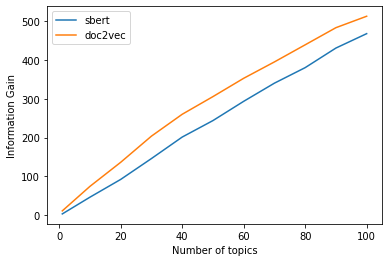

In [43]:
#plot total information gain
x = []
y_use = []
y_sbert = []
y_doc2vec = []
for i in tqdm(range(0, 101, 10)):
  if i == 0:
    n_topics = 1
  else:
    n_topics = i
  
  x.append(n_topics)
  ig_use = calculate_total_information_gain(use, n_topics, k_words=10)
  ig_sbert = calculate_total_information_gain(sbert, n_topics, k_words=10)
  ig_doc2vec = calculate_total_information_gain(doc2vec, n_topics, k_words=10)
  y_use.append(ig_use)
  y_sbert.append(ig_sbert)
  y_doc2vec.append(ig_doc2vec)



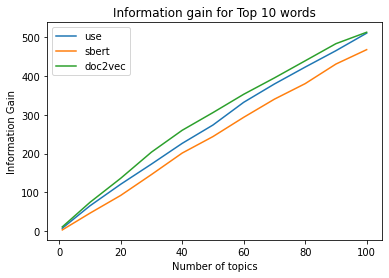

In [45]:
import matplotlib.pyplot as plt
plt.plot(x,y_use, label="use")
plt.plot(x,y_sbert, label="sbert")
plt.plot(x, y_doc2vec, label="doc2vec")
plt.legend()
plt.xlabel("Number of topics")
plt.ylabel("Information Gain")
plt.title("Information gain for Top 10 words")
plt.show()

In [ ]:
#testing word similarity (to be used in zero shot classification)
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["swimming"], num_topics=3, reduced=False) #swimming, cleanliness #keywords_neg=stop,
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Calculate coherence score

In [13]:
def cos_similarity(vector1, vector2):
  """This functions finds the similarity between doc1 and doc2 using cosine similarity. 
  args:
    vector1(list-like): document embedding 1
    vector2(list-like): document embedding 2
  returns:
    cos_sim(float): cosine similarity score between vector1 and vector2"""
  cos_sim = np.dot(vector1, vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))
  return cos_sim


Train fastText Model

In [14]:
docs = sentences
#tokenize docs
import nltk
from nltk import word_tokenize
# docs = [" ".join(word_tokenize(d)) for d in docs]
for i in tqdm(range(len(docs))):
  docs[i] = " ".join(word_tokenize(docs[i]))

docs = [d.lower() for d in docs]

#save sentences in a text file
with open("fastText_training_data.txt", 'w') as f:
  for d in docs:
    f.write(d)

100%|██████████| 986637/986637 [02:32<00:00, 6468.24it/s]


In [15]:
#cbow model :
ft_embeddings = fasttext.train_unsupervised('fastText_training_data.txt', model='cbow')

# Skipgram model :
# ft_embeddings = fasttext.train_unsupervised('fastText_training_data.txt', model='skipgram', verbose=True)


In [21]:
import numpy as np
vec1 = ft_embeddings['clean']
vec2 = ft_embeddings['cleanliness']
np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
ft_embeddings.get_nearest_neighbors("staff", 50)

[(0.9690632820129395, 'stafff'),
 (0.9473206400871277, 'staff-'),
 (0.9403592348098755, 'staff…'),
 (0.9391284584999084, '-staff'),
 (0.9374115467071533, '?staff'),
 (0.9307090044021606, 'staff..'),
 (0.9210945963859558, '.-staff'),
 (0.9195795059204102, 'staffs'),
 (0.8914836645126343, ')staff'),
 (0.8859041333198547, 'staffwe'),
 (0.877535343170166, 'staff.the'),
 (0.8642047047615051, 'staffi'),
 (0.8560912609100342, 'bellstaff'),
 (0.8554027080535889, 'service/staff'),
 (0.8314443826675415, '!staff'),
 (0.8301143050193787, 'staf'),
 (0.8257333040237427, 'personnel'),
 (0.823799729347229, '.staff'),
 (0.8126384615898132, 'professional'),
 (0.808560311794281, '.staffs'),
 (0.807641327381134, 'barstaff'),
 (0.8038359880447388, 'friendly'),
 (0.8013212084770203, 'polite'),
 (0.7995544672012329, 'helpful.the'),
 (0.7964234352111816, '.professional'),
 (0.7952037453651428, 'flagstaff'),
 (0.7927417755126953, 'staffers'),
 (0.7913970947265625, 'staffthis'),
 (0.7910866737365723, 'courteous

In [22]:
def calculate_coherence(words):
  """calculates coherence for top-k words using fastText embeddings by summing up the pairwise cosine distance
  args:
    words (list-like): list of words
  returns:
    coherence_score (float)"""
  #assert that there are no duplicate words in the list
  num_words = len(words)
  coherence_score = 0
  for i in range(num_words):
    for j in range(num_words):
      if i != j:
        vec1 = ft_embeddings[words[i]]
        vec2 = ft_embeddings[words[j]]
        cosine_dist = cos_similarity(vec1, vec2)
        coherence_score += cosine_dist
  coherence_score = coherence_score/num_words
  return coherence_score


In [56]:
def calculate_total_coherence(model, k_words = 20):
  """calculates total coherence for a model, based on sum of pairwise word similarity of top k words in different topics""" 
  
  #get top k words for each topic
  #get topic words and ids
  topic_words, similarity_scores, topic_ids = model.get_topics(reduced=True)
  
  #Get the keywords of each topic
  #create a dictionary with key as topic_id and values as list of document ids
  # print("Building topic index for keywords...")
  topic_words_dict = {}
  for i in topic_ids:
    topic_words_dict[i] = topic_words[i][:k_words] #top k words
  
  avg_coherence = 0
  for topic_id in topic_ids:
    avg_coherence += calculate_coherence(topic_words_dict[topic_id])
  avg_coherence = avg_coherence/len(topic_ids)
  
  return avg_coherence
  


In [59]:
#loop to compare coherence scores of different topic models
#plot total information gain
x = []
# y_use = []
# y_sbert = []
# y_doc2vec = []
for i in tqdm(range(100, -1, -10)):
  if i == 0:
    n_topics = 1
  else:
    n_topics = i
  
  x.append(n_topics)
  #reduce topics to n topics
  # use.hierarchical_topic_reduction(n_topics)
  sbert.hierarchical_topic_reduction(n_topics)
  # doc2vec.hierarchical_topic_reduction(n_topics)

  # coherence_use = calculate_total_coherence(use, k_words=20)
  coherence_sbert = calculate_total_coherence(sbert, k_words=20)
  # coherence_doc2vec = calculate_total_coherence(doc2vec, k_words=20)
  # y_use.append(coherence_use)
  y_sbert.append(coherence_sbert)
  # y_doc2vec.append(coherence_doc2vec)



 73%|███████▎  | 8/11 [1:16:40<29:13, 584.54s/it]

KeyboardInterrupt: ignored

In [66]:
#testing
y_sbert
x = x[:-1]

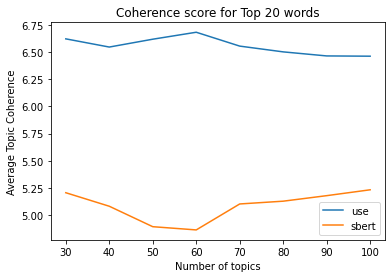

In [67]:
import matplotlib.pyplot as plt
plt.plot(x,y_use[:8], label="use")
plt.plot(x,y_sbert, label="sbert")
# plt.plot(x, y_doc2vec, label="doc2vec")
plt.legend()
plt.xlabel("Number of topics")
plt.ylabel("Average Topic Coherence")
plt.title("Coherence score for Top 20 words")
plt.show()

In [ ]:
"""Some thoughts:
Inside a cluster: documents should be similar to each other. Perhaps coherence measures that. 

Now, for Mutual Information: It tells us, if given some words, does it tell us anything about the documents?
We kind of changed it slightly because now we are taking top 20 words. We are not even taking the frequency
of these words in fact. Just the set of these. 
So what is the question we are asking within a topic? What kind of behavior we want to model?
Given a list of top n words, we want these words to describe the topic. 
In terms of MI, it will be 0 if 
1)words are not related to the topic, 
2)words are too common that they occur virtually in all the docs, e.g., stop words. 
But what about the words that are representative of the topics and occur in most of the docs in a topic?
They will count less towards MI. e.g. Belgium and Beer in the above example. I guess this is one caveat of this. 
But overall, I think IG should be higher if topic words are represntative.
Also, perhaps there is a way to calculate sentence similarity within topics. A metric of topic coherence based on deep learning.
Comparing words with each after doing TF-IDF, removing stop words, etc.  

Also, some text engineering is required to improve the results. 
1. Named entity recognition. 
2. Sentiment word recognition. 
3. Removing the clusters, whose representative words are most of the above two. (e.g. > 50%). Then,
  merge those documents with the nearest clusters. 

Some thoughts about the coherence score:
The traditional coherence score, while good for obtaining the overall performance of the model doesn't 
take into account the semantic similarity of different words and docs. To truly observe the power of
deep learning models we need semantic similarity score which can compare two documents based on their 
representational similarity, and also take context into account. 
Within a topic, pairwise comparisons can take place. And the sum of those similarity scores is the coherence of that topic. 
The sum of coherence of all the topics is the total coherence of the model. 
1. The simplest way to do it is just to take a vector distance for pairwise comparison. Simply substract the vectors from each other
and take their absolute value. 
2. The more sophisticated way would be to remove stop words from two sentences and and somehow do word by word comparison. But 
sentence-BERT is trained on the semantic similarity task, so it is exactly that task. It should be good to go to measure pairwise 
similarity. But I should read the sentence-BERT paper. 
3. The above two metrics may not work with LDA. So, maybe we will have to retort to the traditional coherence score as well.  

Comments about cluster reduction:
Is hierarchical clustering best way to reduce the number of clusters? What are the alternatives?

Comments on calculating the coherence score:
There are two possible routes in calculating the coherence score:
1. Based on top-k words. Summation [Score(w_i, w_j)] / (# of words). Here score function could cosine of word embeddings, UCI or UMass
  - if BERT is used to calculate BERT embeddings, sbert might as well be used. Because, there are no words in BERT,
    there are just tokens. So sometimes, the words would be composed of multiple tokens and some pooling strategy would
    be employed to get the word embeddings. 
  - BERT is slow. But to get OOV embeddings, perhaps fastText would be used. I'm not sure which word embeddings are most
    effective for out of box. 
  - Another concern is, often cosine similarity gives very narrow range in vectors. For that, perhaps baseline rescaling should
    be used. 
  - When I tried to use pretrained fastText, it crashed because pretrained embeddings could not fit in memory. 
  - Alternative is to train my own CBOW using fastText. 
2. Based on documents. Summation [Score(doc_i, doc_j)] / (# of docs). Here score could be bert_score, or cosine of sentence-bert, etc. 
Calculating the word embeddings using some out of the box method would be indeed fastest. Also, unlike UCI or UMass, it would
also take synonyms and plural into account. (No need for stemming).

""" 


In [67]:
# def coherence(doc_vectors):
#   """This function calculates the topic coherence by taking pairwise cosine similarity
#   args:
#     doc_vectors(list-like): list of document vectors(512 or 768 dim)
#   returns:
#     coherence_score(float)"""
#   num_docs = len(doc_vectors)
#   coherence_score = 0
#   similarity_matrix = np.zeros((num_docs, num_docs))
#   for i in range(num_docs):
#     for j in range(num_docs):
#       if i!=j: #the similarity of doc to itself is 1 but we don't count it, so in this matrix it is 0
#         coherence_score += cos_similarity(doc_vectors[i], doc_vectors[j])

#   return coherence_score

Visualization using tensorboard projector

In [ ]:
#get document vectors and plot using umap and tensorboard
#dim reduction using umap
import umap
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=3, 
                            metric='cosine').fit_transform(model.document_vectors)

In [ ]:
#visualize high dim data in embedding projector
# Set up a logs directory, so Tensorboard knows where to look for files
import numpy as np
import tensorflow as tf
log_dir='./logs/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save the weights we want to analyse as a variable. 
umap_weights = tf.Variable(random.choices(umap_embeddings, k=10000))
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=umap_weights)
checkpoint.save(os.path.join(log_dir, "umap_embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
# embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [ ]:
%tensorboard --logdir ./logs/

In [ ]:
#visualize word embeddings: get rid of stopwords, sentiment words, and take more sentences

In [ ]:
#function to process sentence to remove stopwords and sentiment words
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# def process_sentence(s):
#   s = s.lower()

#   stop = stopwords.words('english')
#   sentiment_tags = ['ADJ', 'ADV', 'RB', 'VBZ']


#   words = word_tokenize(s)
#   #remove stop words
#   words = [w for w in words if w not in stop]
#   #remove sentiment words
#   pos_tags = nltk.pos_tag(words)
#   words = [t[0] for t in pos_tags if t[1] not in sentiment_tags]
#   s = " ".join(words)
#   return s